<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Tarea Semanal Nº3
#### Gisela Farace

## Consigna

#### Simulación de un ADC (cuantización) parte 1/2 <br>
En esta tarea simularemos el comportamiento de un ADC y cómo sus parámetros, tamaño de palabra de B bits y frecuencia de muestreo fs afectan a una señal (aproximadamente) analógica.

Para ello se puede analizar una senoidal con los siguientes parámetros:

* frecuencia $f_{0}$ arbitraria, por ejemplo $f_{0}=f_{S/N}=Δf$, 
* Amplitud normalizada, es decir unitaria

Se pide diseñar un bloque cuantizador que opere sobre una señal discreta en tiempo $s_{R}$, de forma tal que para un ADC de B bits y rango ±VF, el operador.

$s_{Q} = Q_{B,VF}${$s_{R}$}

generará una $s_{Q}$ comprendida entre ±VF y con valores discretos establecidos por el paso de cuantización $q=\frac{2.V_{F}}{2^{B}−1}≈\frac{VF}{2^{B−1}}$ (Volts).

Visualice en una misma gráfica $s_{R}$ y $s_{Q}$, donde se pueda observar que tienen el mismo rango en Volts y el efecto de la cuantización para $V_{F}=2$ Volts y  B = 4, 8 y 16 bits.


## Código

### Importación de librerias

In [35]:
# Importación de módulos para Jupyter

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sig

#Presentación de los gŕaficos
mpl.rcParams['figure.figsize'] = (30,40)
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

### Funciones

In [36]:
# Senoidal

def senoidal(vmax, dc, ff, ph, nn, fs):
    ts = 1/fs # tiempo de muestreo
    df = fs/nn # resolución espectral 
    
    # grilla de sampleo temporal
    tt = np.linspace(0, (nn-1)*ts, nn).flatten()
    
    # grilla de sampleo frecuencial
    sen = vmax*np.sin(2*np.pi*ff*tt + ph)+dc
    
    return tt, sen

### Señal senoidal

In [37]:
# Parámetros
vmax = 1
dc = 0
ff = 1
ph = 0
nn = 1000
fs = 100 

tt,xx = senoidal(vmax, dc, ff, ph, nn, fs)

### Cuantización

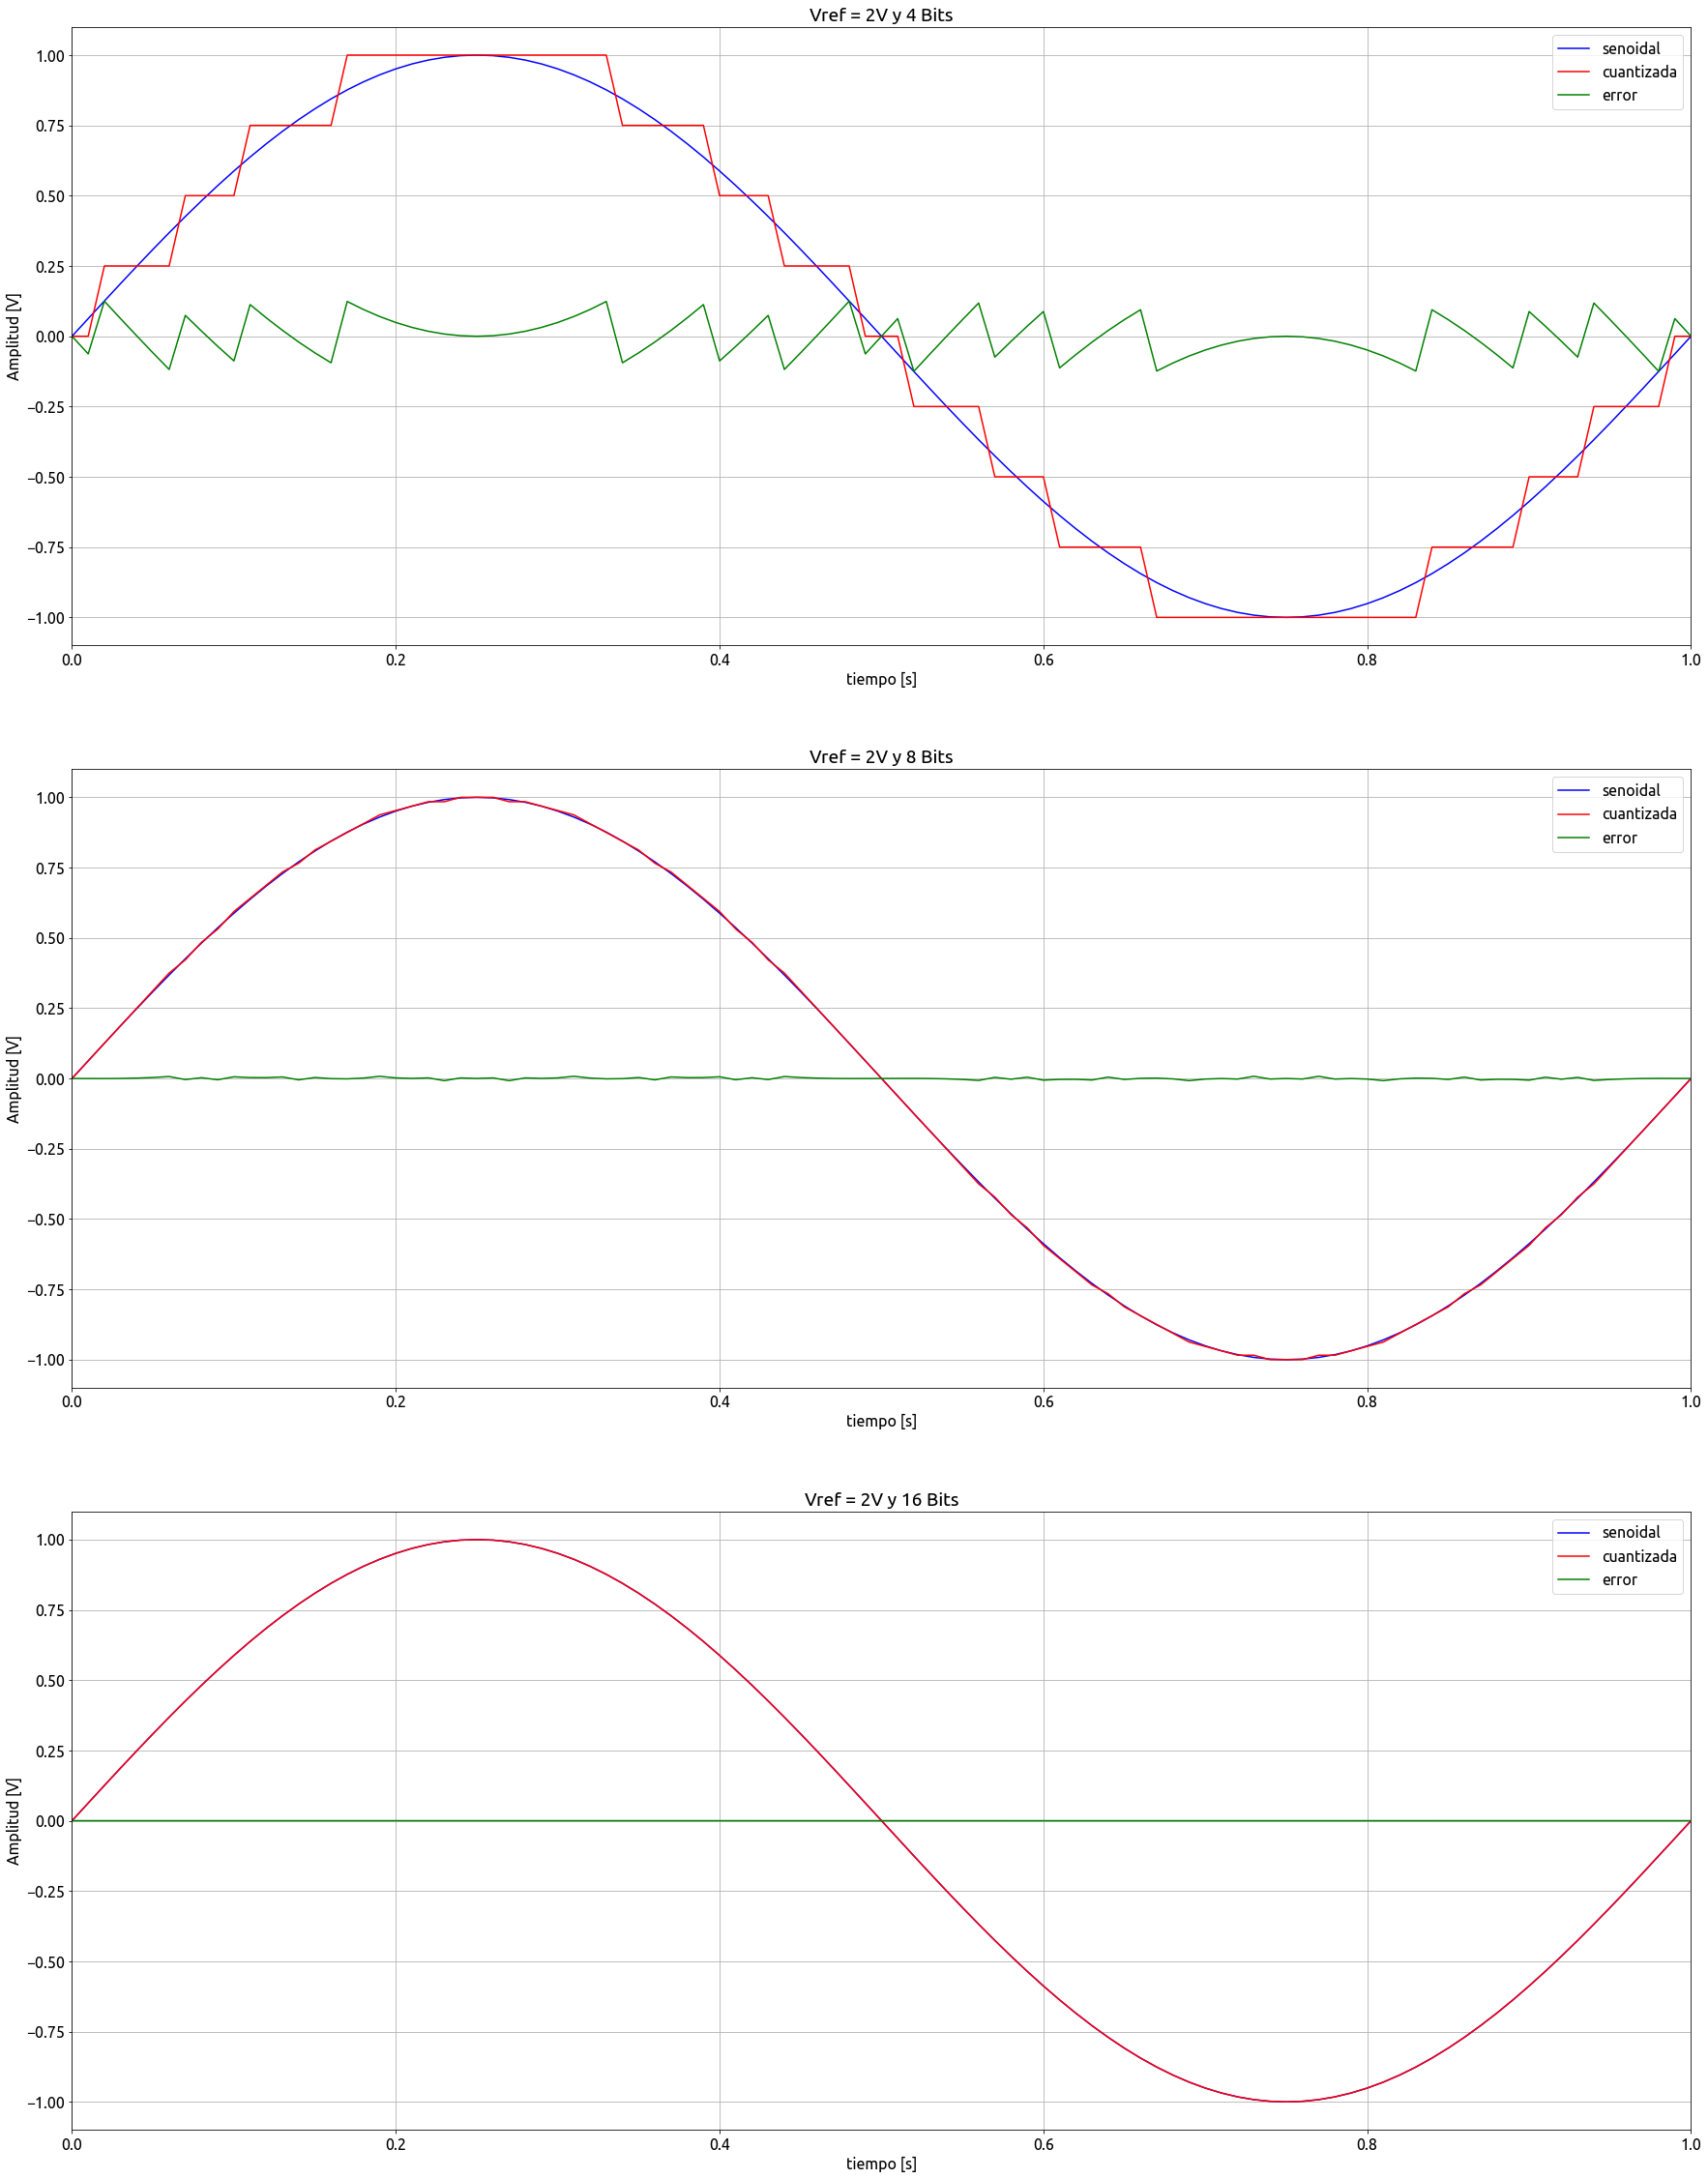

In [38]:
Vref = 2
cont = 0

fig, axs = plt.subplots(3)

for B in [4,8,16]:
    #error de cuantizacion
    q = Vref/2**(B-1)
    x = np.round(xx/q)
    xq = x*q
    error = xq - xx

    axs[cont].plot(tt, xx,'b')
    axs[cont].plot(tt,xq,'r')
    axs[cont].plot(tt,error,'g')
    axs[cont].set_title("Vref = 2V y {} Bits".format(B))
    axs[cont].legend(['senoidal','cuantizada','error'])
    axs[cont].grid()
    axs[cont].set(xlabel='tiempo [s]', ylabel='Amplitud [V]')
    axs[cont].set_xlim(0,1)
    cont +=1

plt.show()

### Cuantización con ruido agregado

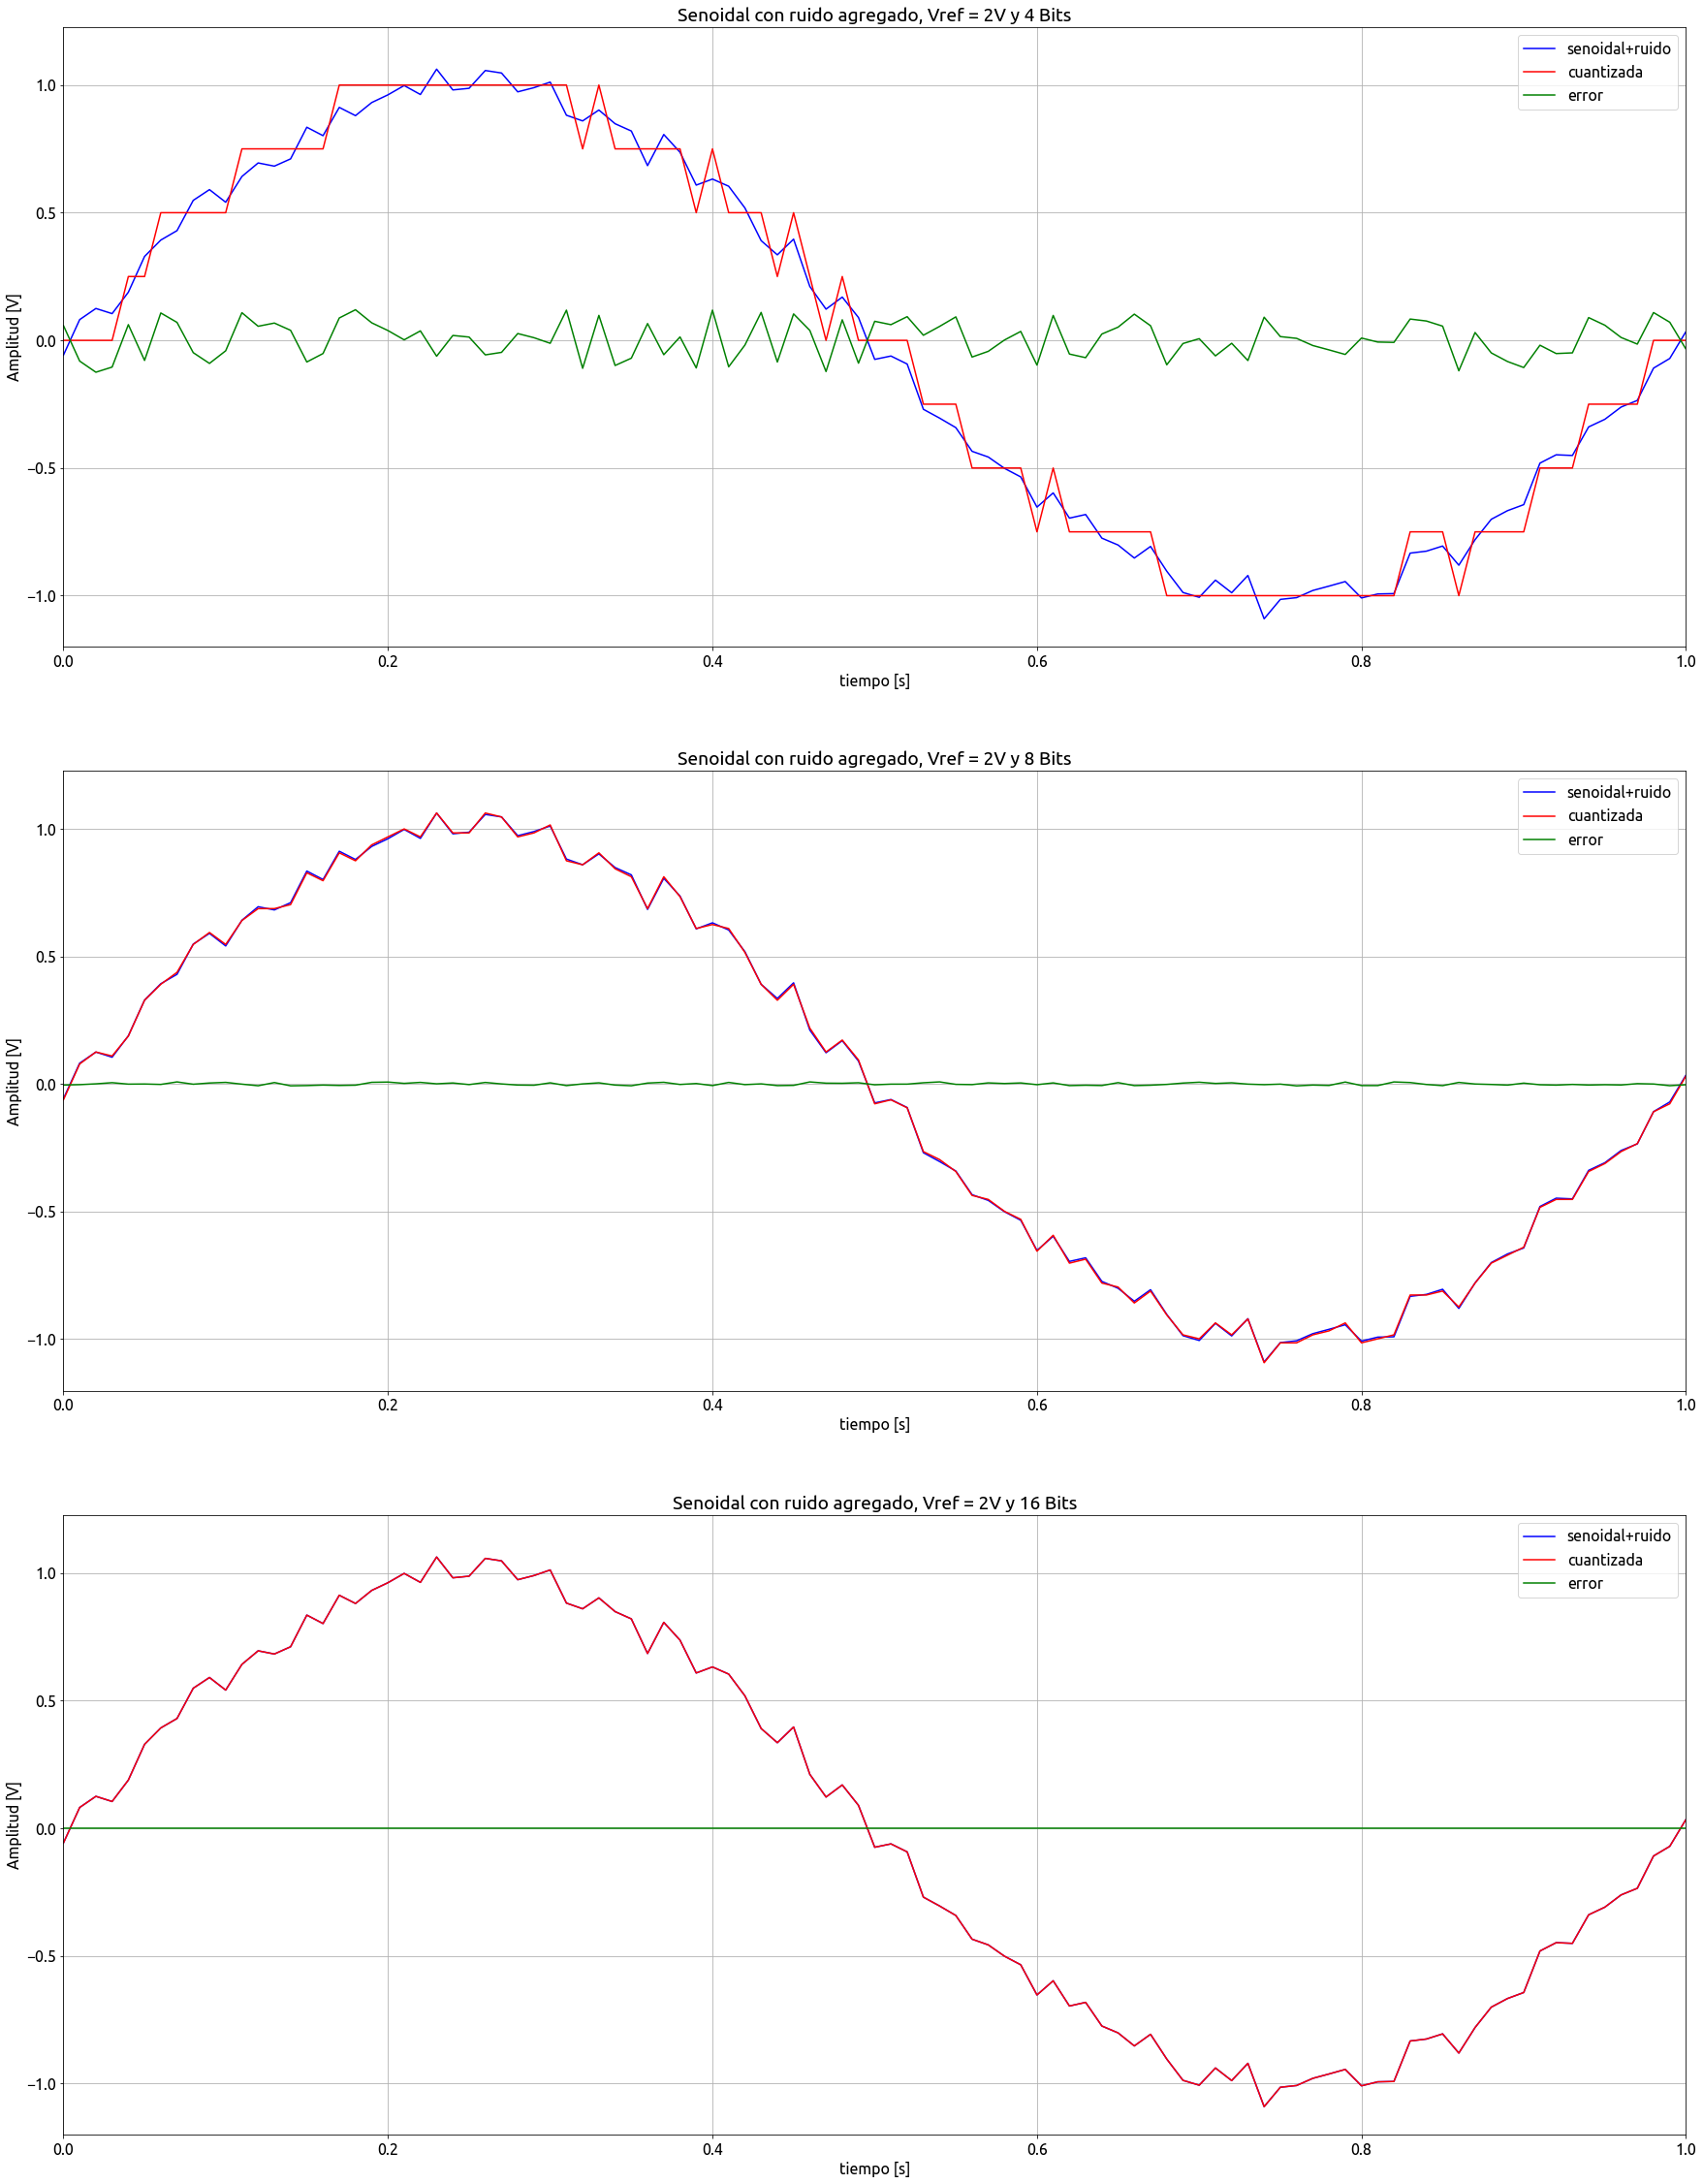

In [39]:
ruido = np.random.normal(0,0.05, size=nn)
x_ruido = xx + ruido

Vref = 2
cont = 0

fig, axs = plt.subplots(3)

for B in [4,8,16]:
    #error de cuantizacion
    q = Vref/2**(B-1)
    x = np.round(x_ruido/q)
    xq = x*q
    error = xq - x_ruido

    axs[cont].plot(tt, x_ruido,'b')
    axs[cont].plot(tt,xq,'r')
    axs[cont].plot(tt,error,'g')
    axs[cont].set_title("Senoidal con ruido agregado, Vref = 2V y {} Bits".format(B))
    axs[cont].legend(['senoidal+ruido','cuantizada','error'])
    axs[cont].grid()
    axs[cont].set(xlabel='tiempo [s]', ylabel='Amplitud [V]')
    axs[cont].set_xlim(0,1)
    cont +=1

plt.show()